Darcy Flow

In [4]:
import numpy as np
from fenics import *
import os

# Settings
n_samples = 100       # number of PDE instances
nx, ny = 64, 64       # spatial resolution
save_dir = "darcy_dataset"
os.makedirs(save_dir, exist_ok=True)

# PDE setup: -div(k grad(u)) = f, u=0 on boundary
mesh = UnitSquareMesh(nx - 1, ny - 1)
V = FunctionSpace(mesh, "P", 1)

def solve_darcy(k_field, f_expr):
    k = Function(V)
    k.vector()[:] = k_field

    u = TrialFunction(V)
    v = TestFunction(V)

    a = k * dot(grad(u), grad(v)) * dx
    L = f_expr * v * dx

    u_sol = Function(V)
    bc = DirichletBC(V, Constant(0.0), "on_boundary")
    solve(a == L, u_sol, bc)
    return u_sol.vector().get_local()

# Random data generation
for i in range(n_samples):
    # random permeability
    k_random = np.exp(np.random.normal(0, 1, V.dim()))  # log-normal distribution
    f_expr = Expression("sin(2*pi*x[0])*sin(2*pi*x[1])", degree=2)

    u_sol = solve_darcy(k_random, f_expr)

    # Save as numpy arrays
    np.save(os.path.join(save_dir, f"k_{i}.npy"), k_random.reshape((ny, nx)))
    np.save(os.path.join(save_dir, f"u_{i}.npy"), u_sol.reshape((ny, nx)))

print(f"Dataset generated in '{save_dir}' with {n_samples} samples")


Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

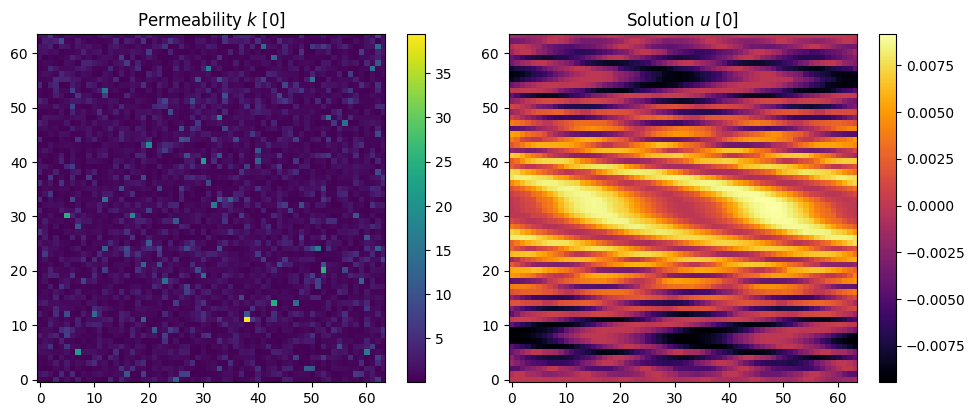

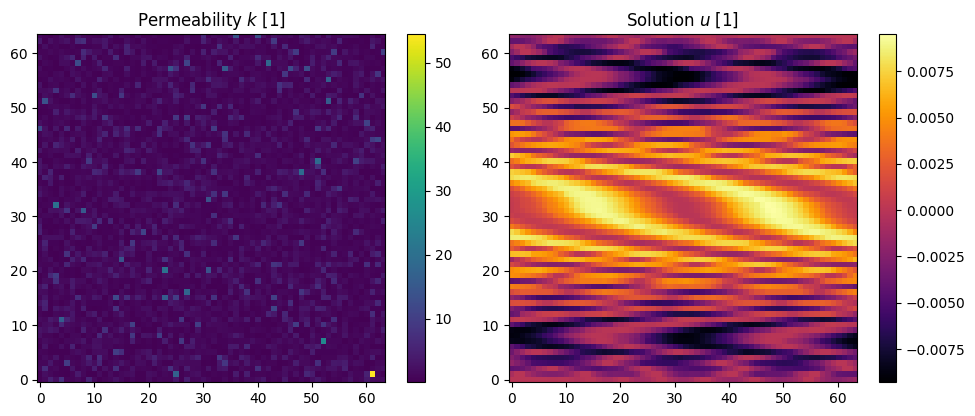

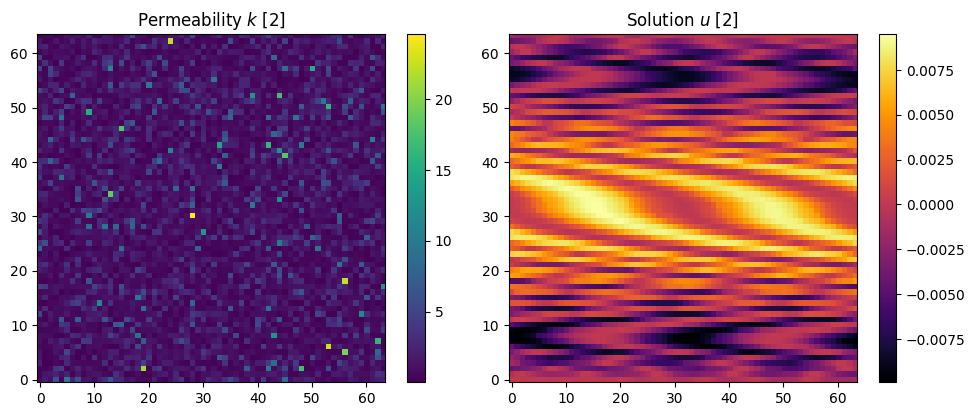

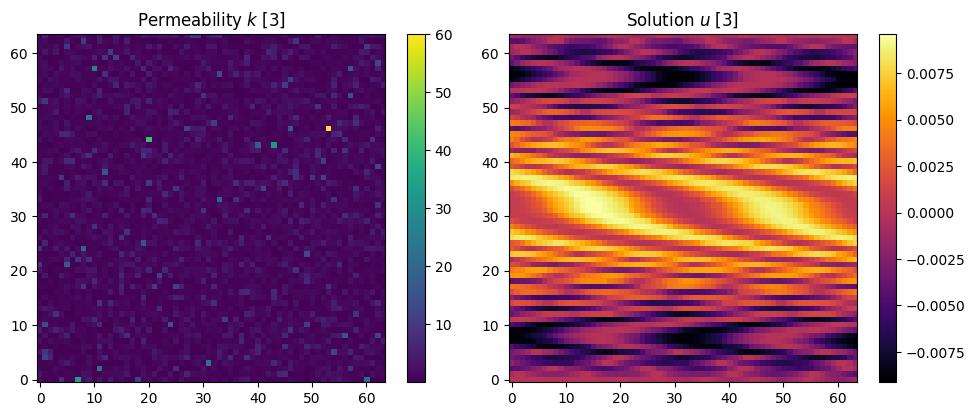

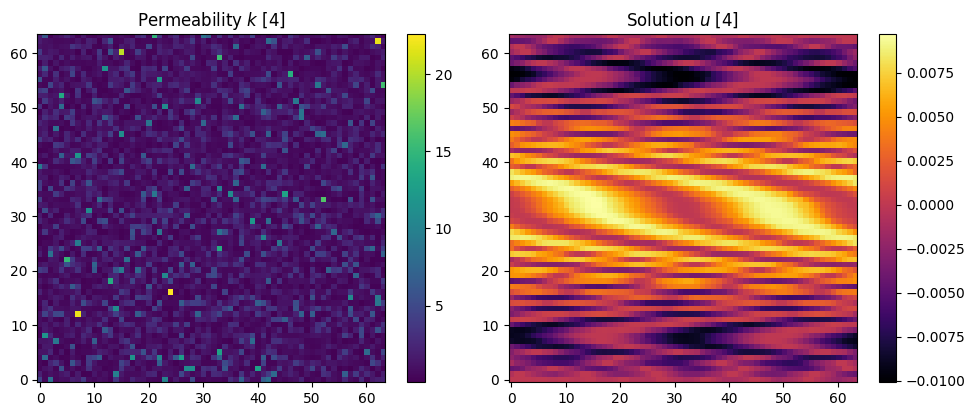

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Set the dataset directory
save_dir = "darcy_dataset"
n_samples = 5  # Number of samples to visualize
nx, ny = 64, 64

# Plot a few samples
for i in range(n_samples):
    k = np.load(os.path.join(save_dir, f"k_{i}.npy"))
    u = np.load(os.path.join(save_dir, f"u_{i}.npy"))

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    im0 = axs[0].imshow(k, cmap="viridis", origin="lower")
    axs[0].set_title(f"Permeability $k$ [{i}]")
    fig.colorbar(im0, ax=axs[0])

    im1 = axs[1].imshow(u, cmap="inferno", origin="lower")
    axs[1].set_title(f"Solution $u$ [{i}]")
    fig.colorbar(im1, ax=axs[1])

    plt.tight_layout()
    plt.show()

Burgers 1D 

In [1]:
import numpy as np
from fenics import *
from scipy.io import savemat
import os

# SETTINGS
n_samples = 10          # number of PDE instances
nx = 151                # spatial resolution (matches your data)
nt = 151                # time steps (matches your data)
T = 1.0                 # final time
nu = 0.01               # viscosity
dt = T / (nt - 1)

save_dir = "burgers1d_dataset_mat"
os.makedirs(save_dir, exist_ok=True)

# FENICS SETUP
mesh = UnitIntervalMesh(nx - 1)
V = FunctionSpace(mesh, "P", 1)

# Coordinates for saving
x = mesh.coordinates().flatten()
x = x.reshape(1, -1)   # shape (1, nx)

# Test/trial functions
u = Function(V)         # current
u_n = Function(V)       # previous
v = TestFunction(V)

# Boundary condition: u = 0 on both ends
bc = DirichletBC(V, Constant(0.0), "on_boundary")

# MAIN LOOP
for i in range(n_samples):

    # Random smooth initial condition
    amp = np.random.uniform(0.5, 1.0)
    freq = np.random.randint(1, 4)
    u_init = Expression(f"{amp:.3f}*sin({freq}*pi*x[0])", degree=3)
    u_n.assign(interpolate(u_init, V))

    snapshots = np.zeros((nt, nx))
    snapshots[0, :] = u_n.vector().get_local()

    # Weak form (semi-implicit)
    F = ( (u - u_n) / dt * v * dx
        + u_n * u.dx(0) * v * dx
        + nu * u.dx(0) * v.dx(0) * dx )

    # Time stepping
    for n in range(1, nt):
        solve(F == 0, u, bc)
        u_n.assign(u)
        snapshots[n, :] = u.vector().get_local()

    # Save .mat file
    data_dict = {"u": snapshots, "x": x}
    savemat(os.path.join(save_dir, f"burgers_{i}.mat"), data_dict)
    print(f"Saved sample {i+1}/{n_samples}")

print(f"\n Dataset saved in '{save_dir}' ({n_samples} files, each with u and x)")

Calling FFC just-in-time (JIT) compiler, this may take some time.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 6.997e+00 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 3.429e-15 (tol = 1.000e-10) r (rel) = 4.901e-16 (tol = 1.000e-09)
  Newton solver finished in 1 iterations and 1 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 5.917e-02 (tol = 1.000e-10) r (rel) = 1.000e+00 (

Burgers 2D

In [1]:
import numpy as np
import scipy.io as sio
import os
from tqdm import trange

# --------------------------- User parameters ---------------------------
Nx = 64         # number of x-grid points to store (and x-grid for simulation)
Ny = 64         # number of y-grid points for simulation (will average over y)
Nt = 50         # number of time steps to store
Lx = 1.0
Ly = 1.0
Tfinal = 1.0    # final time
nu = 0.01       # viscosity

Ntrain = 800
Nvali = 100
Ntest = 100

save_path = "2D_Burger_generated.mat"

# Forcing options
n_modes = 3    # number of sinusoidal modes combined to make forcing
max_freq = 3   # maximum integer frequency in each direction
amplitude_scale = 1.0

# Time-stepping parameters (CFL condition)
dt = Tfinal / (Nt - 1)

# spatial grid
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y, indexing='xy')

# helper: create one forcing field f(x,y,t) with sinusoidal modes
def make_forcing(t, seed=None):
    rng = np.random.RandomState(seed)
    f = np.zeros((Ny, Nx), dtype=np.float32)
    for m in range(n_modes):
        kx = rng.randint(1, max_freq+1)
        ky = rng.randint(1, max_freq+1)
        amp = rng.randn() * amplitude_scale
        phase = rng.uniform(0, 2*np.pi)
        omega = rng.uniform(-2*np.pi, 2*np.pi)
        f += amp * np.sin(2*np.pi*(kx * X / Lx + ky * Y / Ly) + omega * t + phase)
    return f

# Finite-difference solver for one sample
def simulate_sample(seed=None):
    rng = np.random.RandomState(seed)
    # initial condition: small random field
    u = 0.1 * rng.randn(Ny, Nx).astype(np.float32)

    # storage for time series (Ny, Nx, Nt)
    U = np.zeros((Ny, Nx, Nt), dtype=np.float32)
    F = np.zeros((Ny, Nx, Nt), dtype=np.float32)

    # Precompute wavenumbers for periodic derivatives (we'll use periodic BCs)
    dx = Lx / (Nx - 1)
    dy = Ly / (Ny - 1)

    for ti in range(Nt):
        t = ti * dt
        f = make_forcing(t, seed=rng.randint(1_000_000))
        F[:, :, ti] = f

        # record current state
        U[:, :, ti] = u

        # compute derivatives (central differences, periodic)
        # roll-based periodic derivatives
        u_x = (np.roll(u, -1, axis=1) - np.roll(u, 1, axis=1)) / (2*dx)
        u_y = (np.roll(u, -1, axis=0) - np.roll(u, 1, axis=0)) / (2*dy)
        u_xx = (np.roll(u, -1, axis=1) - 2*u + np.roll(u, 1, axis=1)) / (dx*dx)
        u_yy = (np.roll(u, -1, axis=0) - 2*u + np.roll(u, 1, axis=0)) / (dy*dy)

        # time update (explicit)
        conv = u * u_x + u * u_y
        diffusion = nu * (u_xx + u_yy)
        u = u + dt * ( - conv + diffusion + f )

    return U, F

# Generate datasets
def generate_dataset(N_total, start_seed=0):
    # Pre-allocate arrays in compressed storage shape (N_total, Nx, Nt)
    u_data = np.zeros((N_total, Nx, Nt), dtype=np.float32)
    f_data = np.zeros((N_total, Nx, Nt), dtype=np.float32)

    for i in trange(N_total, desc="Generating samples"):
        seed = start_seed + i
        U, F = simulate_sample(seed=seed)
        # average over y to reduce Ny -> Nx (matches your .mat shape (Nx, Nt))
        # we transpose to have shape (Nx, Nt)
        u_avg = U.mean(axis=0)  # (Nx, Nt)
        f_avg = F.mean(axis=0)  # (Nx, Nt)

        u_data[i] = u_avg
        f_data[i] = f_avg

    return u_data, f_data

if __name__ == '__main__':
    # create splits
    np.random.seed(42)
    total_required = Ntrain + Nvali + Ntest

    # Generate samples in batches to avoid extremely long loops (but here it's straight)
    u_all, f_all = generate_dataset(total_required, start_seed=0)

    # Split
    u_train = u_all[:Ntrain]
    u_vali = u_all[Ntrain:Ntrain+Nvali]
    u_test = u_all[Ntrain+Nvali:]

    f_train = f_all[:Ntrain]
    f_vali = f_all[Ntrain:Ntrain+Nvali]
    f_test = f_all[Ntrain+Nvali:]

    # x and t arrays shaped as (1, Nx) and (1, Nt) to match your example
    x_out = x.reshape(1, -1)
    t_out = np.linspace(0, Tfinal, Nt).reshape(1, -1)

    mdict = {
        'x': x_out.astype(np.float32),
        't': t_out.astype(np.float32),
        'u_train': u_train.astype(np.float32),
        'u_vali': u_vali.astype(np.float32),
        'u_test': u_test.astype(np.float32),
        'f_train': f_train.astype(np.float32),
        'f_vali': f_vali.astype(np.float32),
        'f_test': f_test.astype(np.float32),
    }

    print(f"Saving dataset to {save_path} ...")
    sio.savemat(save_path, mdict)
    print("Done.")


Generating samples:   0%|          | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_2680/3696519532.py:77: RuntimeWarning: overflow encountered in multiply
  conv = u * u_x + u * u_y
/tmp/ipykernel_2680/3696519532.py:77: RuntimeWarning: overflow encountered in add
  conv = u * u_x + u * u_y
/tmp/ipykernel_2680/3696519532.py:77: RuntimeWarning: invalid value encountered in add
  conv = u * u_x + u * u_y
/tmp/ipykernel_2680/3696519532.py:73: RuntimeWarning: invalid value encountered in subtract
  u_xx = (np.roll(u, -1, axis=1) - 2*u + np.roll(u, 1, axis=1)) / (dx*dx)
/tmp/ipykernel_2680/3696519532.py:73: RuntimeWarning: overflow encountered in divide
  u_xx = (np.roll(u, -1, axis=1) - 2*u + np.roll(u, 1, axis=1)) / (dx*dx)
/tmp/ipykernel_2680/3696519532.py:74: RuntimeWarning: invalid value encountered in subtract
  u_yy = (np.roll(u, -1, axis=0) - 2*u + np.roll(u, 1, axis=0)) / (dy*dy)
/tmp/ipykernel_2680/3696519532.py:74: RuntimeWarning: invalid value encountered in add
  u_yy = (np.roll(u, -1, 

Saving dataset to 2D_Burger_generated.mat ...
Done.
